# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.show()

In [2]:
df = pd.read_csv('../data/raw/calories.csv')

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,301957,female,21,188.0,84.0,16.0,100.0,40.4,80.0
1,407676,female,48,165.0,68.0,11.0,91.0,40.2,54.0
2,244464,male,28,178.0,77.0,23.0,103.0,40.5,125.0
3,38748,female,32,156.0,54.0,29.0,105.0,41.1,179.0
4,297351,male,24,172.0,75.0,6.0,77.0,39.4,9.0


In [4]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   User_ID     200000 non-null  int64  
 1   Gender      200000 non-null  object 
 2   Age         200000 non-null  int64  
 3   Height      200000 non-null  float64
 4   Weight      200000 non-null  float64
 5   Duration    200000 non-null  float64
 6   Heart_Rate  200000 non-null  float64
 7   Body_Temp   200000 non-null  float64
 8   Calories    200000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 13.7+ MB


In [6]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,375070.734115,41.413635,174.704690,75.144635,15.406140,95.465290,40.035489,88.202230
std,216678.216689,15.172583,12.816047,13.977698,8.359774,9.463222,0.780548,62.493882
min,1.000000,20.000000,129.000000,39.000000,1.000000,67.000000,37.100000,1.000000
25%,187046.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374533.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,76.000000
75%,563072.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,135.000000
max,749995.000000,79.000000,222.000000,128.000000,30.000000,128.000000,41.500000,314.000000


## Distribución de target

<Axes: title={'center': 'Distribución de Calorías Quemadas'}, ylabel='Frequency'>

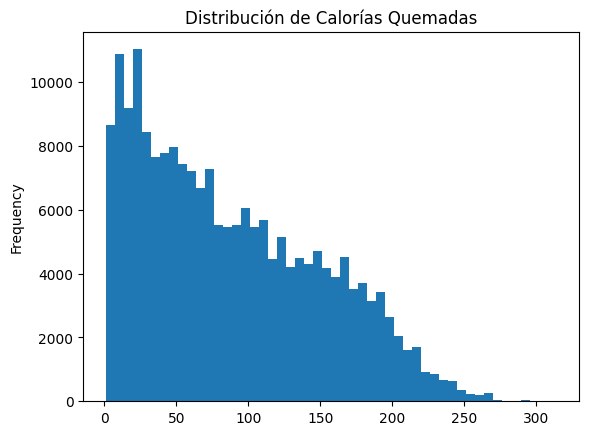

In [7]:
df['Calories'].plot(kind='hist', bins=50, title='Distribución de Calorías Quemadas')

## Distribución de las variables numéricas

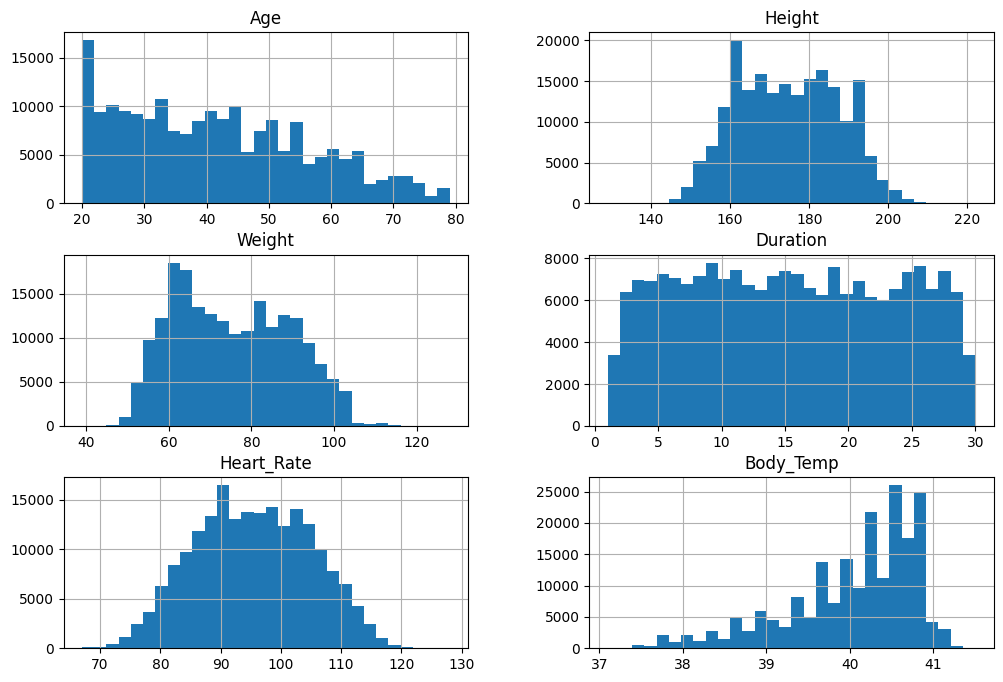

In [8]:
df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']].hist(bins=30, figsize=(12, 8))
plt.show()

In [9]:
x_vars=['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

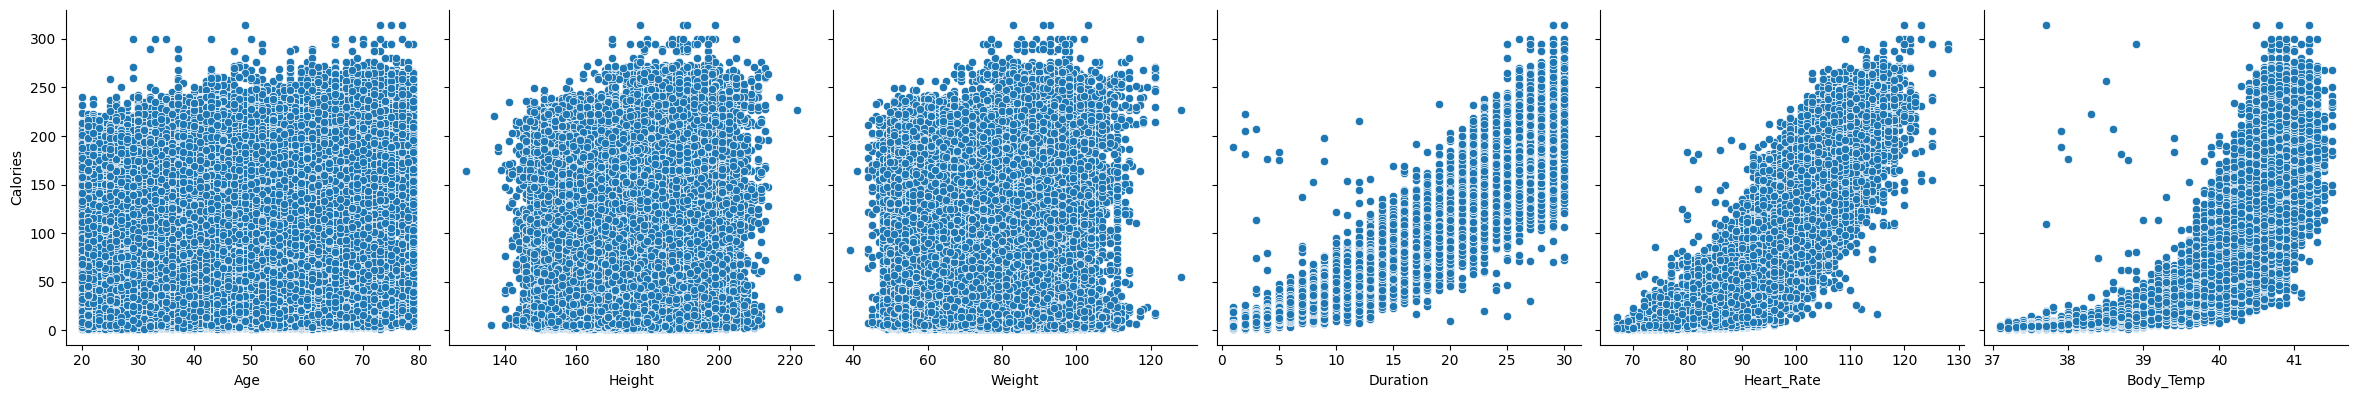

In [10]:
sns.pairplot(df, x_vars=x_vars, y_vars=['Calories'], height=4)
plt.show()

## Mapa de calor de correlaciones

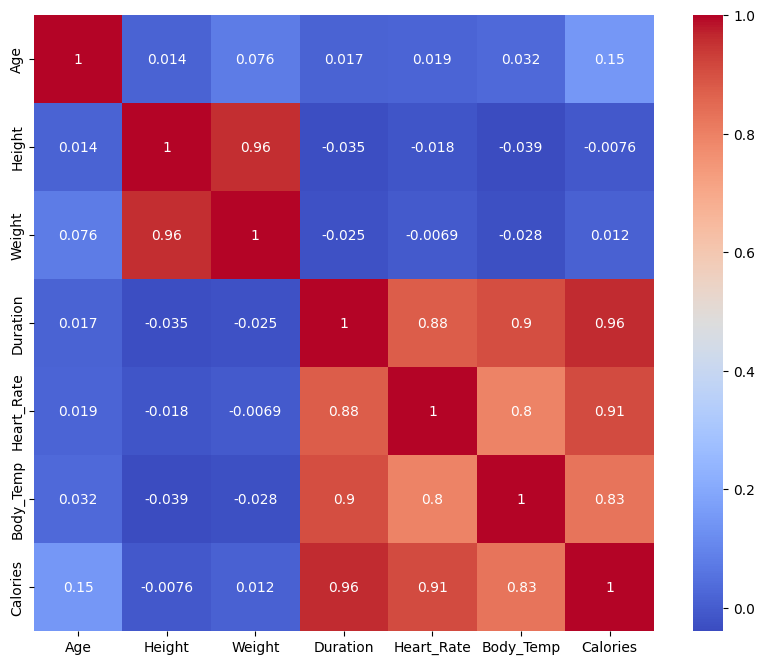

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('User_ID', axis=1).corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## Resultados iniciales

* La variable Calories tiene un sesgo positivo; log1p es una buena idea.
* No hay datos faltantes.
* Gender es categórica y necesita ser convertida a numérica.
* Las variables Duration, Heart_Rate y Body_Temp estan correlacionadas con el target.
* Se podrían crear nuevas características basadas en el conocimiento del dominio (como el BMI o fórmulas de Frecuencia Cardíaca Máxima).